In [1]:
import numpy as np
from data7 import data,x,y,z
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from pyowl import OwlRegressor
from mpl_toolkits.mplot3d import Axes3D
from laplace import get_laplace, knn_laplace,extend_knn,cordinate, distance
from kMeans import kMeans, min_k_index, max_k_index
from LocalL1 import locaL1
import copy

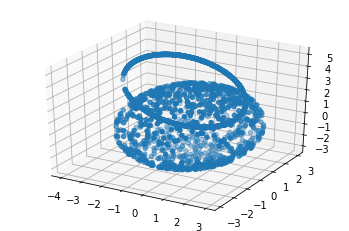

In [2]:
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,z)

In [3]:
n_sample=len(data[0])
n_feature=len(data)

In [484]:
# alpha=0.000001, K=2000, k1=200, k2=8, works good
# alpha=0.000001，K=2000, k1=250, k2=8
alpha=0.000001
K=2000
k1=250
k2=8

In [485]:
indexs=np.random.choice(range(n_feature),K)
B=np.zeros((n_feature,n_feature))

In [486]:
B=locaL1(data,indexs,B,alpha,k1,k2)
B=np.abs(B)

In [487]:
L=get_laplace(B)

In [488]:
u,v=np.linalg.eig(L)
v=np.real(v)
u=np.real(u)

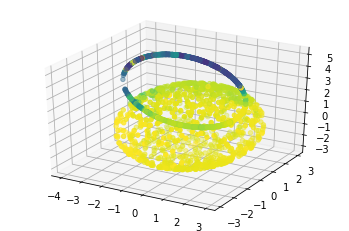

In [489]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z,c=v[:,min_k_index(u,2)])

In [274]:
nonzero=[]
for index in range(1000):
    nonzero.append(np.count_nonzero(B[:,index]))
nonzero_idx=[]
for i in range(1000):
    if nonzero[i]!=0:
        nonzero_idx.append(i)

In [11]:
index=nonzero_idx[20]
print(index)
print(nonzero[index])
if nonzero[index]<10:
    n=nonzero[index]
else:
    n=10
idx=[]
for i in range(1,n+1):
    idx.append(max_k_index(B[:,index],i))
print(idx)

55
85
[999, 452, 380, 289, 963, 729, 56, 541, 864, 532]


IndexError: list index out of range

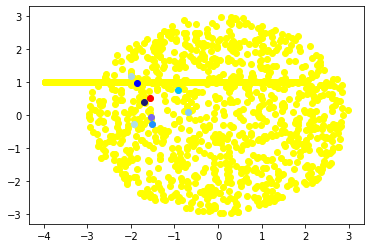

In [12]:
colour=['midnightblue','blue','mediumslateblue','dodgerblue','deepskyblue','lightskyblue','powderblue','lightblue']
ax=plt.subplot(111)
ax.scatter(x,y,color='yellow')
ax.scatter(x[index],y[index],color='red')
for i in range(n):
    ax.scatter(x[idx[i]],y[idx[i]],color=colour[i])

In [ ]:
colour=['midnightblue','blue','mediumslateblue','dodgerblue','deepskyblue','lightskyblue','powderblue','lightblue']
ax=plt.subplot(111)
ax.scatter(x,z,color='yellow')
ax.scatter(x[index],z[index],color='red')
for i in range(n):
    ax.scatter(x[idx[i]],z[idx[i]],color=colour[i])

In [ ]:
colour=['midnightblue','blue','mediumslateblue','dodgerblue','deepskyblue','lightskyblue','powderblue','lightblue']
ax=plt.subplot(111)
ax.scatter(y,z,color='yellow')
ax.scatter(y[index],z[index],color='red')
for i in range(n):
    ax.scatter(y[idx[i]],z[idx[i]],color=colour[i])

In [490]:
mdat1=np.zeros((n_feature,1))
mdat1[:,0]=v[:,min_k_index(u,2)]

In [491]:
pre_idx1=kMeans(mdat1,2)[:,0]

In [492]:
x_1=[]
y_1=[]
z_1=[]
x_2=[]
y_2=[]
z_2=[]
data_1=[]
data_2=[]
for i in range(len(pre_idx1)):
    if pre_idx1[i]==0:
        x_1.append(x[i])
        y_1.append(y[i])
        z_1.append(z[i])
        data_1.append(data[i])
    else:
        x_2.append(x[i])
        y_2.append(y[i])
        z_2.append(z[i])
        data_2.append(data[i])

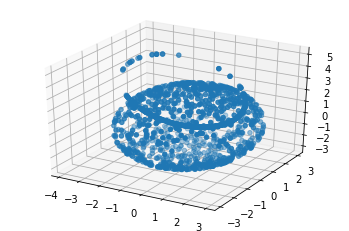

In [493]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_2,y_2,z_2)

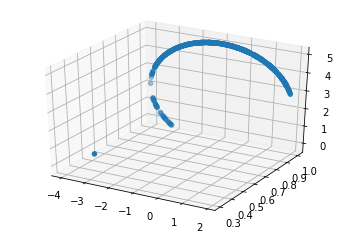

In [494]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x_1,y_1,z_1)

In [13]:
# compare with KNN
W=knn_laplace(data,10)
u1,v1=np.linalg.eig(W)
u1=np.real(u1)
v1=np.real(v1)

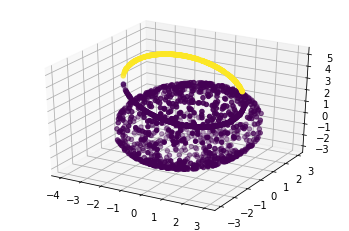

In [14]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z,c=v1[:,min_k_index(u1,2)])